# Simple Image Trade : Buyer Side

The code below buys an image from a predefined address on the dopamine network, and pays 6 DOPA for it

for running this sample we need the dopapy library.

In [1]:
import dopapy
import dopapy.types as dd
import dopapy.trading as dp

In [2]:
import warnings
warnings.filterwarnings('ignore') #Thats just to ignore warnings that are irrelevant for this type of sample

In [3]:
dopapy.init_logging()

Creating a session object that represents the web service hosted by the user,
this session will have access to a local Ethereum wallet in keystore_dir_a:

In [4]:
session = dp.create_session(master_password='password123456',
                            keystore_dir='/data/dopamine/keystore_dir_a/',
                            web_server_host="127.0.0.1",
                            web_server_port=8002,
                            dopmn_budget=1,
                            ether_budget=int(10E18))

Checking balance before the trade:

In [5]:
print('DOPA Balance:{0}',session.wallet.dopmn_balance)
print('ETH  Balance:{0}',session.wallet.ether_balance)

DOPA Balance:{0} 94
ETH  Balance:{0} 79761443800000000000


Getting a handle to a remote quote:

In [6]:
other_quote = dp.get_counter_quote(url="https://127.0.0.1:8001", quote_id=0)

Describing the service i'd like to use, the service should output an image of a certain size,
and I'm willing to work only with specific remote source

In [7]:
service_descriptor = dd.ServiceDescriptor(output_descriptors=[dd.ImageDescriptor(pixel_size=[2000, 526])],
                                          remote_sources=[other_quote])

Creating a quote for buying the given image for no more than 6 DOPAs

In [8]:
my_quote = dp.create_quote(session=session,
                           quote_id=0,
                           service_descriptor=service_descriptor,
                           side=dp.BUY,
                           reward_descriptor=dp.create_reward_descriptor(min_gas_price=int(75E9),
                                                                         max_dopamine_price=int(1)))

Getting a handle for the given service and executing it.
In this line a handshaking is made with the remote service, checking the the expectations of price and data match
and only then the data is passed, encrypted, and decrypted only after the reward is given

In [9]:
actual_image = dp.get_remote_service(my_quote).call()

Checking the image purchased:

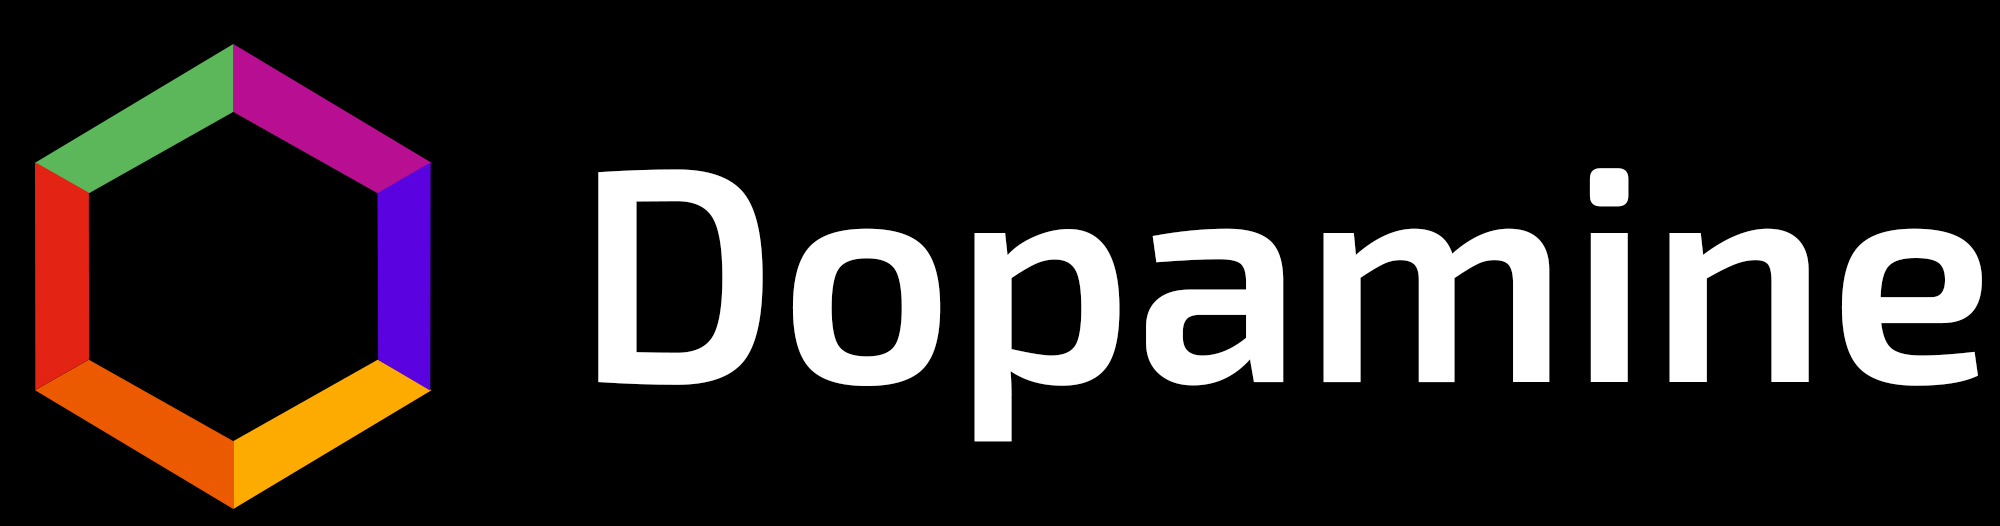

In [10]:
actual_image.image

Checking balance after the trade:

In [11]:
print('DOPA Balance:{0}',session.wallet.dopmn_balance)
print('ETH  Balance:{0}',session.wallet.ether_balance)

DOPA Balance:{0} 93
ETH  Balance:{0} 79740803800000000000
